# Маркетинговый анализ приложения Procrastinate Pro+

Развлекательное приложение Procrastinate Pro+ последние несколько месяцев компания терпит убытки, несмотря на огромные вложения в рекламу.


**Цель исследования:** выявить причины убытков, разработать рекомендации для сокращения убытков и получения прибыли.


**Задачи исследования:**
1. Изучить откуда приходят пользователи и какими устройствами они пользуются,
2. Определить сколько стоит привлечение пользователей из различных рекламных каналов;
3. Оценить сколько денег приносит каждый клиент,
4. Выяснить когда расходы на привлечение клиента окупаются,
5. Определить какие факторы мешают привлечению клиентов.

**Описание данных:**

Предоставлены данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.

**Показатели:**

Структура visits_info_short:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

### Загрузка данных и подготовка их к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
try:
    visits = pd.read_csv()
    orders = pd.read_csv()
    ad_costs = pd.read_csv()
except:
    visits = pd.read_csv()
    orders = pd.read_csv()
    ad_costs = pd.read_csv()

**Получим первичную информацию по датасетам**

**visits**

In [3]:
visits.head()    

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visits.isna().sum()

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [6]:
print('Количество дубликатов:', visits.duplicated().sum())

Количество дубликатов: 0


**orders**

In [7]:
orders.head()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
orders.isna().sum()

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [10]:
print('Количество дубликатов:', orders.duplicated().sum())

Количество дубликатов: 0


**ad_costs**

In [11]:
ad_costs.head()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [12]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
ad_costs.isna().sum()

dt         0
Channel    0
costs      0
dtype: int64

In [14]:
print('Количество дубликатов:', ad_costs.duplicated().sum())

Количество дубликатов: 0


**Скорректируем названия столбцов в соответствии с принятыми стандартами**

In [15]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
ad_costs.columns = ad_costs.columns.str.lower().str.replace(' ', '_')

**Изменим тип данных в столбцах, содержащих дату и время**

In [16]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

**Вывод по разделу:**

В ходе предобработки данных был изменен тип данных в столбцах, содержащих информацию о дате и времени событий. А также скорректированы названия колонок в соответствии с принятыми стандартами.
Дубликатов и пропусков выявлено не было.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [17]:
def get_profiles(sessions, orders, ad_costs):


    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [18]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [19]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time 

In [20]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']


    def group_by_dimensions(df, dims, horizon_days):

        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )

        result = result.fillna(0).cumsum(axis=1)

        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'}))

        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)

        result = result[['cohort_size'] + list(range(horizon_days))]

        result['cohort_size'] = cohort_sizes

        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []


    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw, 
        result_grouped, 
        result_in_time,
        roi_grouped,
        roi_in_time,
    )

In [21]:
def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])

    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)

    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]

    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [23]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])

    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [24]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])

    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])

    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)

    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)

    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)

    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [25]:
profiles = get_profiles(visits, orders, ad_costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

**Максимальная и минимальная даты привлечения пользователей**

In [26]:
min_data = profiles['dt'].min()
max_data = profiles['dt'].max()
print('Минимальная дата привлечения пользователей:', min_data)
print('Максимальная дата привлечения пользователей:', max_data)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


Вывод: исходя из максимальной и минимальной даты, в профилях отражена информация о пользователях, привлеченных с 1 мая по 27 октября 2019 года.

**Распределение пользователей по странам**

In [27]:
(profiles
       .pivot_table(index='region', values='payer', aggfunc=['count', 'sum', 'mean'])
       .reset_index()
       .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ratio'})
       .droplevel(1, axis=1)
       .sort_values(by='ratio', ascending=False)
       .style.format({'ratio':'{:.2%}'})
)

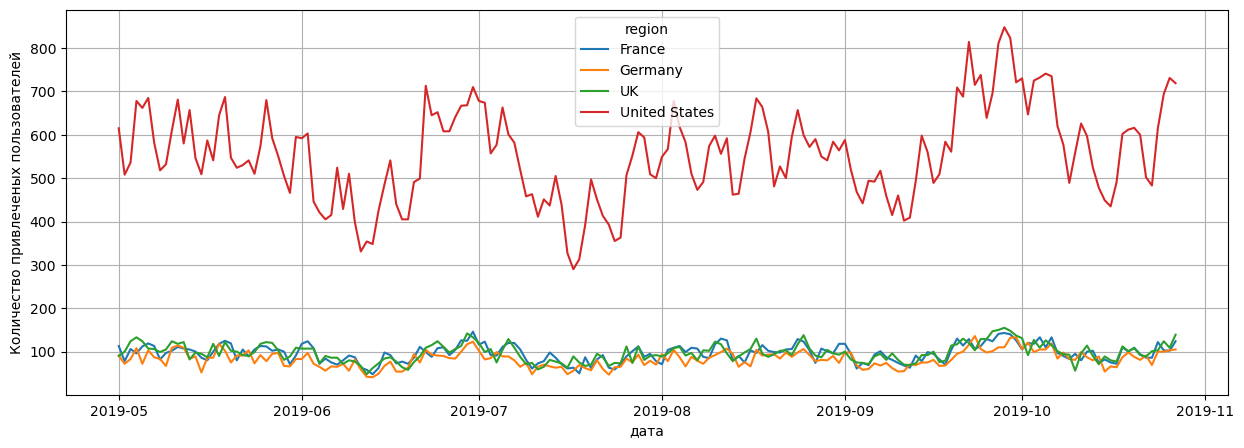

In [28]:
%matplotlib inline

profiles.pivot_table(
    index='dt',
    columns='region',
    values='user_id',
    aggfunc='nunique'
).plot(figsize=(15, 5), grid=True)
plt.xlabel('дата')
plt.ylabel('Количество привлеченых пользователей')

plt.show()

По полученным результатам видно, что в приложение было больше всего привлечено пользователей из США, они же чаще остальных становились покупателями (в 6,9% случаев).


На графике заметна сезонность в количестве привлеченных пользователей: пики привлечения приходятся на конец квартала, спады - на начало квартала. Возможно, это связано с дедлайнами по квартальной отчетности и росте объема работы. Можно предположить, что по мере отдаления от дедлайнов уровень прокрастинации растет (соответственно, активнее привлекаются пользователи в развлекательное приложение), а по мере приближения к новым дедлайнам - количество привлекаемых пользователей сокращается.

**Распределение пользователей по используемым устройствам**

In [29]:
(profiles
       .pivot_table(index='device', values='payer', aggfunc=['count', 'sum', 'mean'])
       .reset_index()
       .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ratio'})
       .droplevel(1, axis=1)
       .sort_values(by='ratio', ascending=False)
       .style.format({'ratio':'{:.2%}'})
)

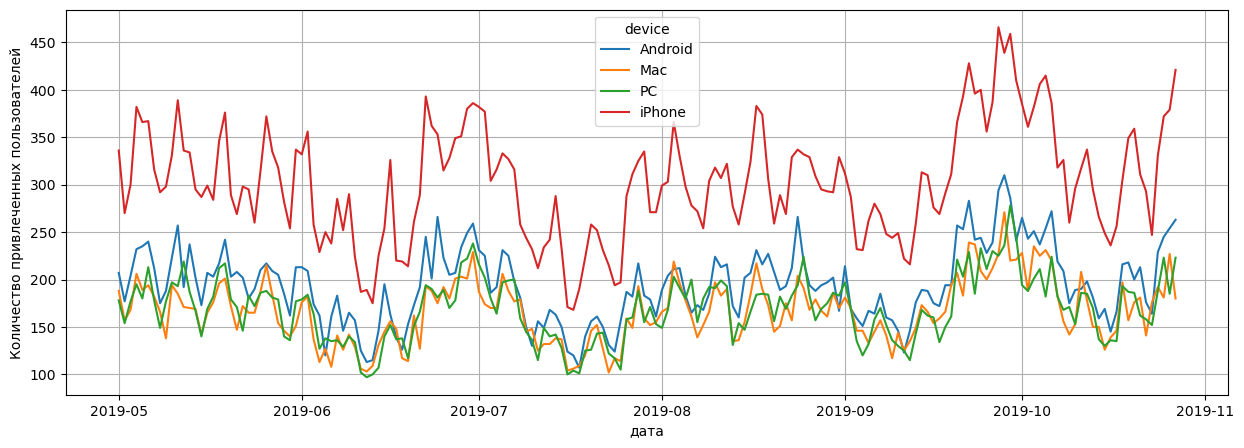

In [30]:
%matplotlib inline

profiles.pivot_table(
    index='dt',
    columns='device',
    values='user_id',
    aggfunc='nunique'
).plot(figsize=(15, 5), grid=True)
plt.xlabel('дата')
plt.ylabel('Количество привлеченных пользователей')

plt.show()

Чаще всего привлеченные пользователи использовали iPhone. Платящие пользователи предпочитали Mac или iPhone.
На графике видна та же сезонность, что и в распределении по странам.

**Распределение пользователей по каналам привлечения**

In [31]:
(profiles
       .pivot_table(index='channel', values='payer', aggfunc=['count', 'sum', 'mean'])
       .reset_index()
       .rename(columns={'count': 'all_users', 'sum': 'paying_users', 'mean': 'ratio'})
       .droplevel(1, axis=1)
       .sort_values(by='ratio', ascending=False)
       .style.format({'ratio':'{:.2%}'})
)

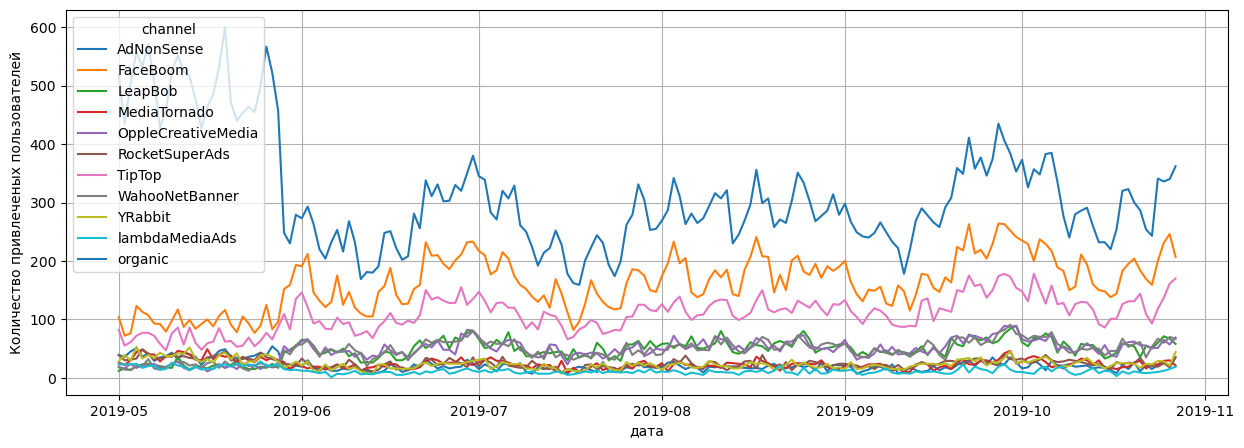

In [32]:
%matplotlib inline

profiles.pivot_table(
    index='dt',
    columns='channel',
    values='user_id',
    aggfunc='nunique'
).plot(figsize=(15, 5), grid=True)
plt.xlabel('дата')
plt.ylabel('Количество привлеченых пользователей')

plt.show()

Чаще всего в приложение привлекались органические пользователи, однако платящими они становились реже всего. На втором месте по количеству привлеченных пользователей идет реклама в FaceBoom: эти пользователи чаще всего становились платящими (более чем в 12% случаев).


На графике видна та же сезонность, что и в распределении по странам и устройствам.
Кроме того, видно, что в мае органических пользователей было привлечено значительно больше, чем в другие периоды. В конце мая видно резкое падение количества привлеченных пользователей.

**Вывод по разделу:**

В результате исследовательского анализа были получены следующие результаты:

1. Были получены профили пользователей, которые лежат в переменной profiles.

2. Определены максимальная и минимальная даты привлечения пользователей в датасете: изучаемый период - с 1 мая по 27 октября 2019 года.

3. Выявлено, что больше всего в приложение было привлечено пользователей из США, они же чаще остальных становились покупателями (6,9% от общего числа американских пользователей). 

4. Выявлено, что чаще всего привлеченные пользователи использовали iPhone, а платящие пользователи - Mac или iPhone.

5. В разрезе источников данных больше всего привлекались органические пользователи, однако платящими они становились реже остальных. Помимо органических пользователей самым успешным источником является FaceBoom, эти пользователи чаще всего становились платящими (более, чем в 12% случаев).

6. На графиках привлечения пользователей в разрезе всех трех характеристик видна сезонность: пики привлечения приходятся на конец квартала, спады - на начало квартала. Предположительно, это может быть связано с приближением и отдалением квартальных дедлайнов.

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника.

**Общая сумма расходов на маркетинг**

In [33]:
print(round(ad_costs['costs'].sum(), 2))

105497.3


**Распределение трат по рекламным источникам**

In [34]:
ad_costs_by_channel = ad_costs.groupby('channel')\
        .agg({'costs': 'sum'})\
        .reset_index()
ad_costs_by_channel['rate'] = round((ad_costs_by_channel['costs'] / ad_costs['costs'].sum())*100, 1)
ad_costs_by_channel.sort_values(by = 'costs', ascending=False)

channel     costs  rate
6              TipTop  54751.30  51.9
1            FaceBoom  32445.60  30.8
7      WahooNetBanner   5151.00   4.9
0          AdNonSense   3911.25   3.7
4  OppleCreativeMedia   2151.25   2.0
5      RocketSuperAds   1833.00   1.7
2             LeapBob   1797.60   1.7
9      lambdaMediaAds   1557.60   1.5
3        MediaTornado    954.48   0.9
8             YRabbit    944.22   0.9

По данным видно, что на рекламу в TipTop и FaceBoom было потрачено больше всего средств.

**Визуализация динамики изменения расходов во времени по каждому источнику**

In [35]:
ad_costs['month'] = ad_costs['dt'].astype('datetime64[M]')
ad_costs['week'] = pd.to_datetime(ad_costs['dt']).dt.isocalendar().week

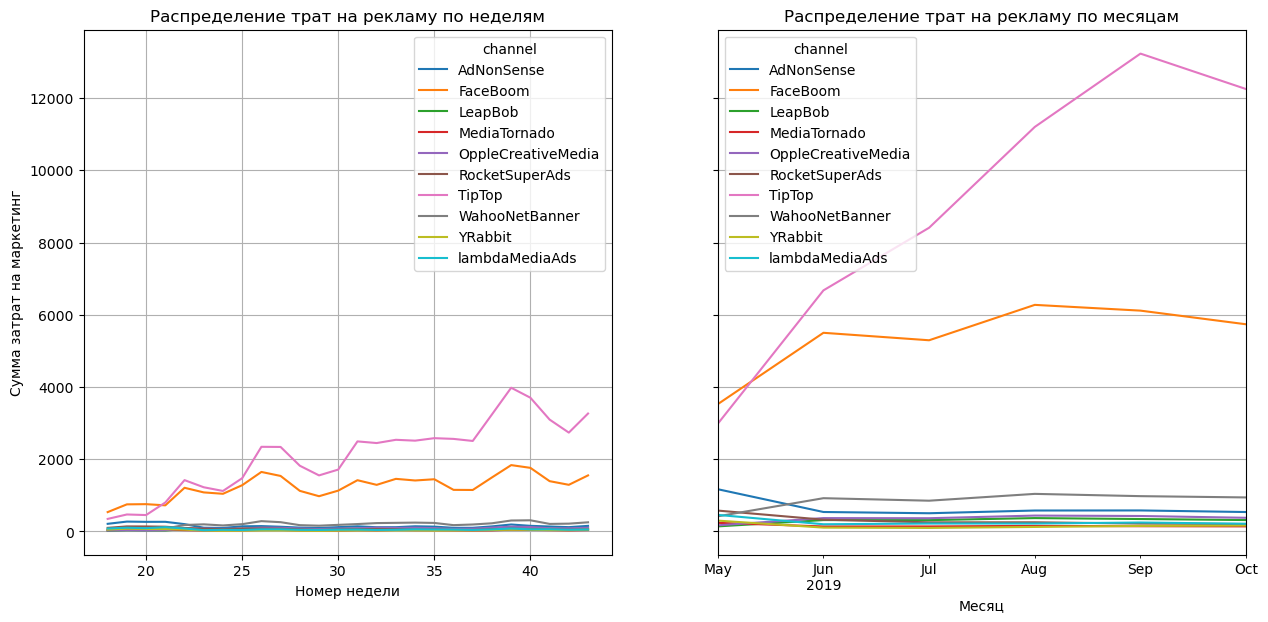

In [36]:
%matplotlib inline

ax1 = plt.subplot(2, 2, 1)
ad_costs.pivot_table(
    index='week',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(title = 'Распределение трат на рекламу по неделям', figsize=(15, 15), grid=True, ax=ax1)
plt.xlabel('Номер недели')
plt.ylabel('Сумма затрат на маркетинг')


ax2 = plt.subplot(2, 2, 2, sharey=ax1)
ad_costs.pivot_table(
    index='month',
    columns='channel',
    values='costs',
    aggfunc='sum'
).plot(title = 'Распределение трат на рекламу по месяцам', figsize=(15, 15), grid=True, ax=ax2)
plt.xlabel('Месяц')
plt.ylabel('Сумма затрат нв маркетинг')

plt.show()

По графику виден стабильный рост трат на рекламу в FaceBoom. В октябре расходы на рекламу в FaceBoom немного сократились. Это может быть связано с тем, что октябрь в датасете представлен только до 27 числа. Кроме того, судя по недельному графику к концу месяца траты все же увеличились.

В TipTop сильный рост был заметен до августа, далее расходы на рекламу через этот источник немного начали сокращаться.

**Привлечение одного пользователя (CAC) из каждого источника**

In [37]:
profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='mean')\
        .sort_values(by = 'acquisition_cost', ascending=False)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

Самая дорогая стоимость привлечения клиента через канал TipTop, она превышает CAC следующего канала (FaceBoom) в 2,5 раза. Запомним это для дальнейшего анализа окупаемости рекламы.

**Вывод по разделу:**

В результате анализа расходов на маркетинг были получены следующие сведения:
1. Общая сумма затрат на рекламу за изучаемый период составила $105497.3.


2. Больше всего средств было потрачено на рекламу в TipTop и FaceBoom.


3. Траты на рекламу в FaceBoom в течение изучаемого периода росли, небольшое сокращение можно заметить только в октябре (возможно, из-за неполноты данных за октябрь).


4. Траты на рекламу в TipTop росли до августа, после чего начали немного сокращаться.


5. Стоимость привлечения клиента через канал TipTop значительно превышает другие источники (более чем в 2,5 раза).

### Оценка окупаемости рекламы

- Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.
- Проверим конверсию пользователей и динамику её изменения, а также удержание пользователей.
- Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

**Зададим момент и горизонт анализа.**
Моментом анализа будет 1 ноября 2019 года. Горизонтом анализа будет 14 дней, поскольку в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [38]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
profiles = profiles.query('channel != "organic"')

**Общие графики LTV, ROI, динамики LTV, CAC и ROI****

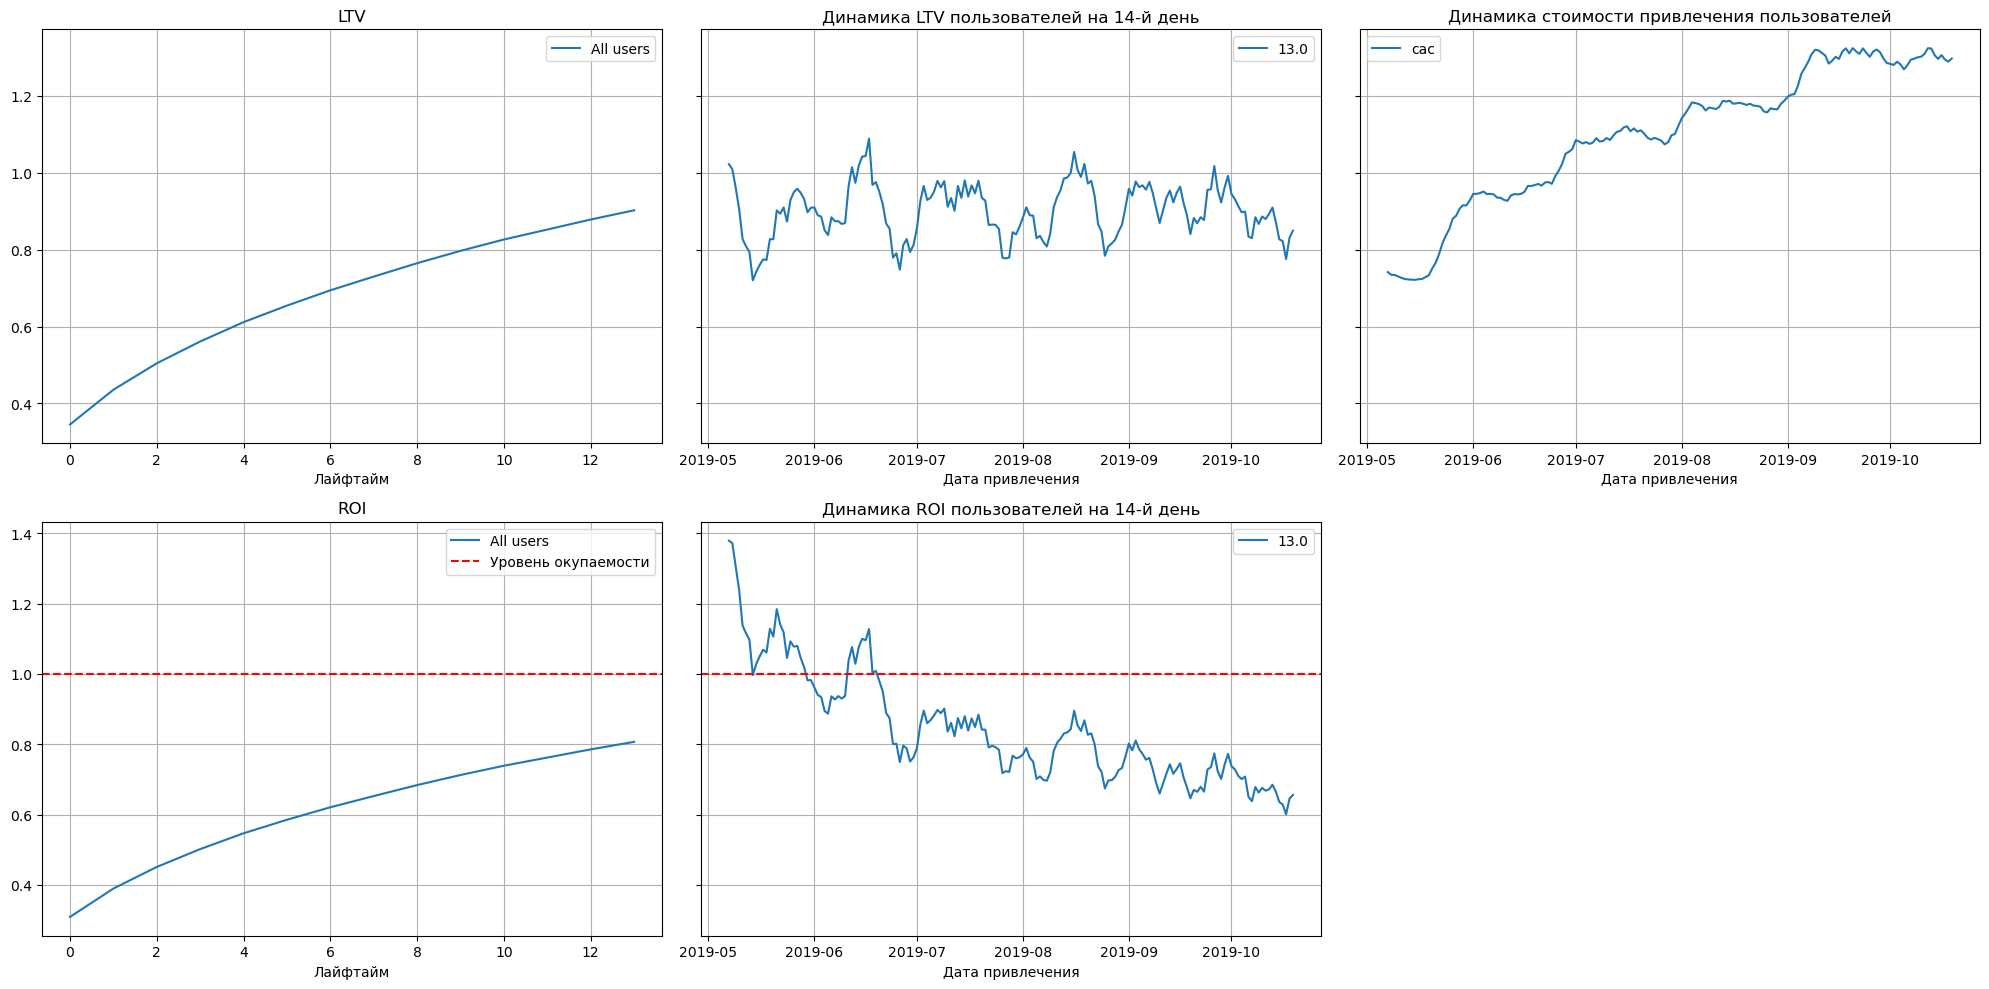

In [39]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

По графикам можно сделать следующие выводы:
- Реклама не окупается. ROI в конце второй недели — чуть выше 80%.
- CAC сильно растет. Скорее всего, здесь сосредоточена одна из причин убытков компании.
- На LTV влияет сезонный фактор, о котором мы говорили в исследовательском анализе.

**Общие графики конверсии и удержания**

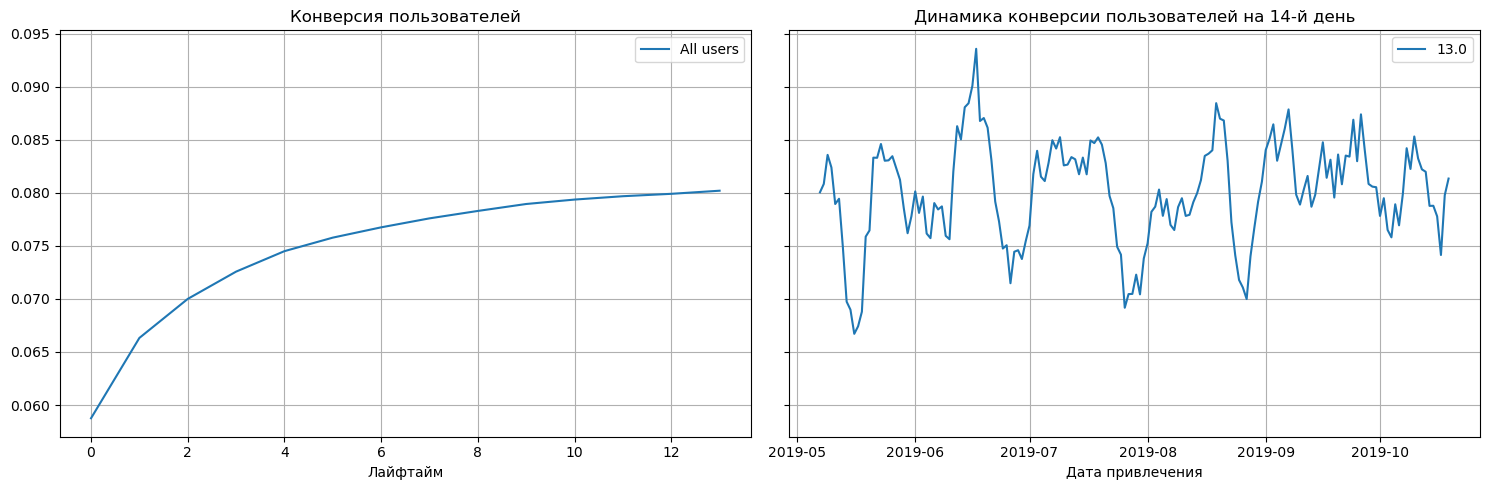

In [40]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, коверсия в конце мая - начале июня выросла.

Посмотрим на удержание. 

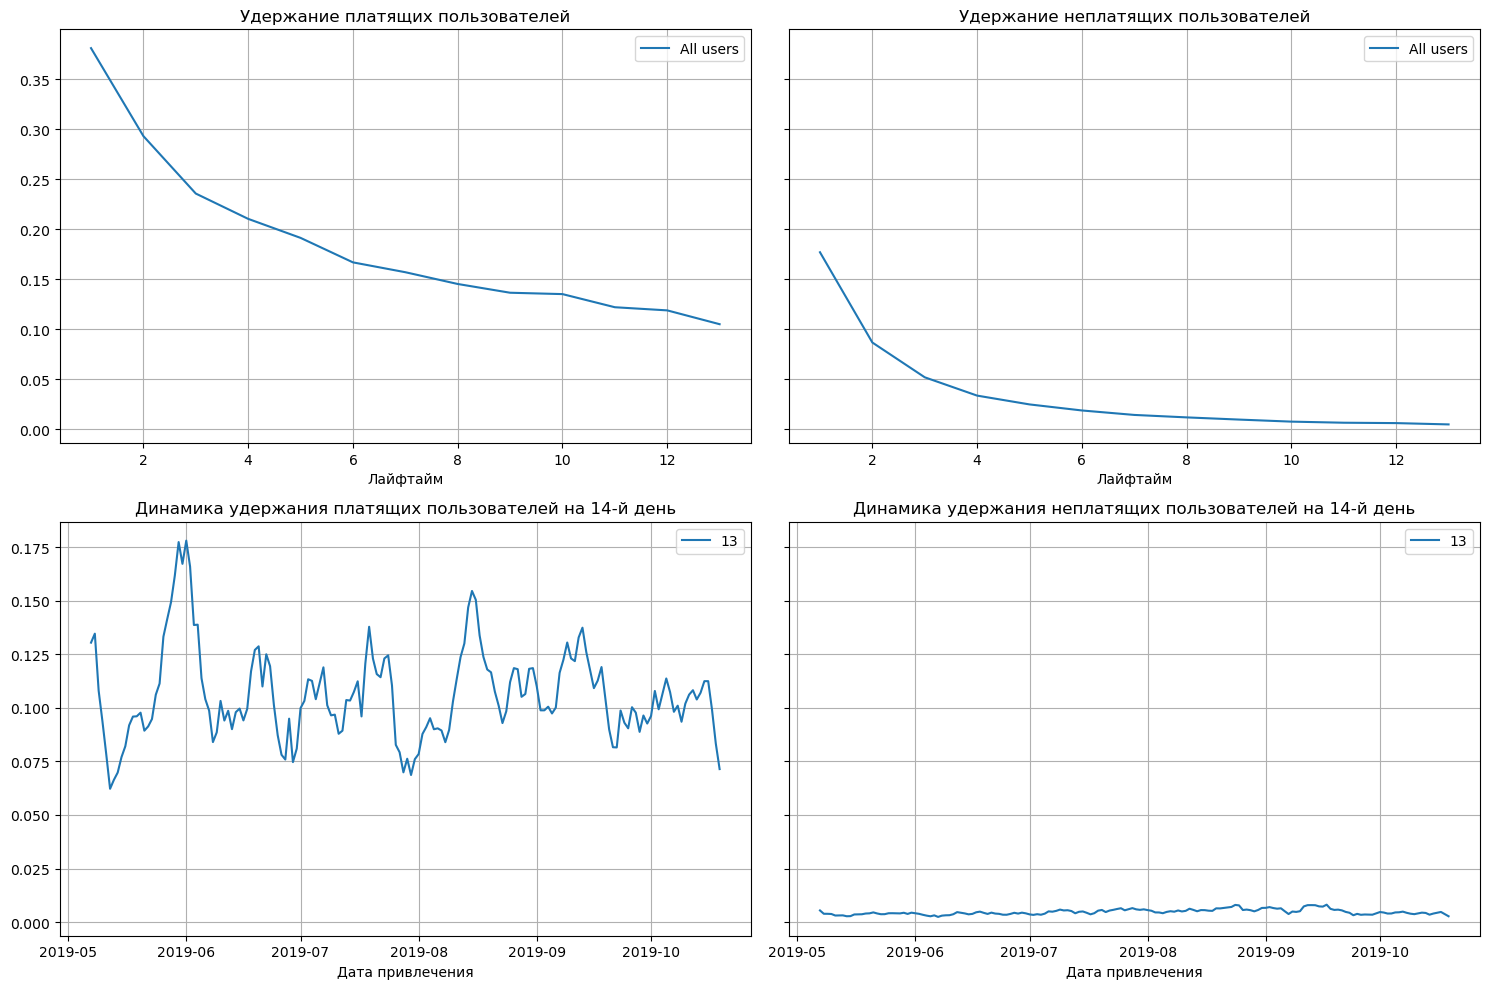

In [41]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Пока по общим графикам сложно сделать выводы о том, что повлияло на убыток компании. Поэтому посмотрим на разбивку по устройствам, странам и каналам.

**Графики LTV, ROI, динамики LTV, CAC и ROI, конверсия и удержание по устройствам**

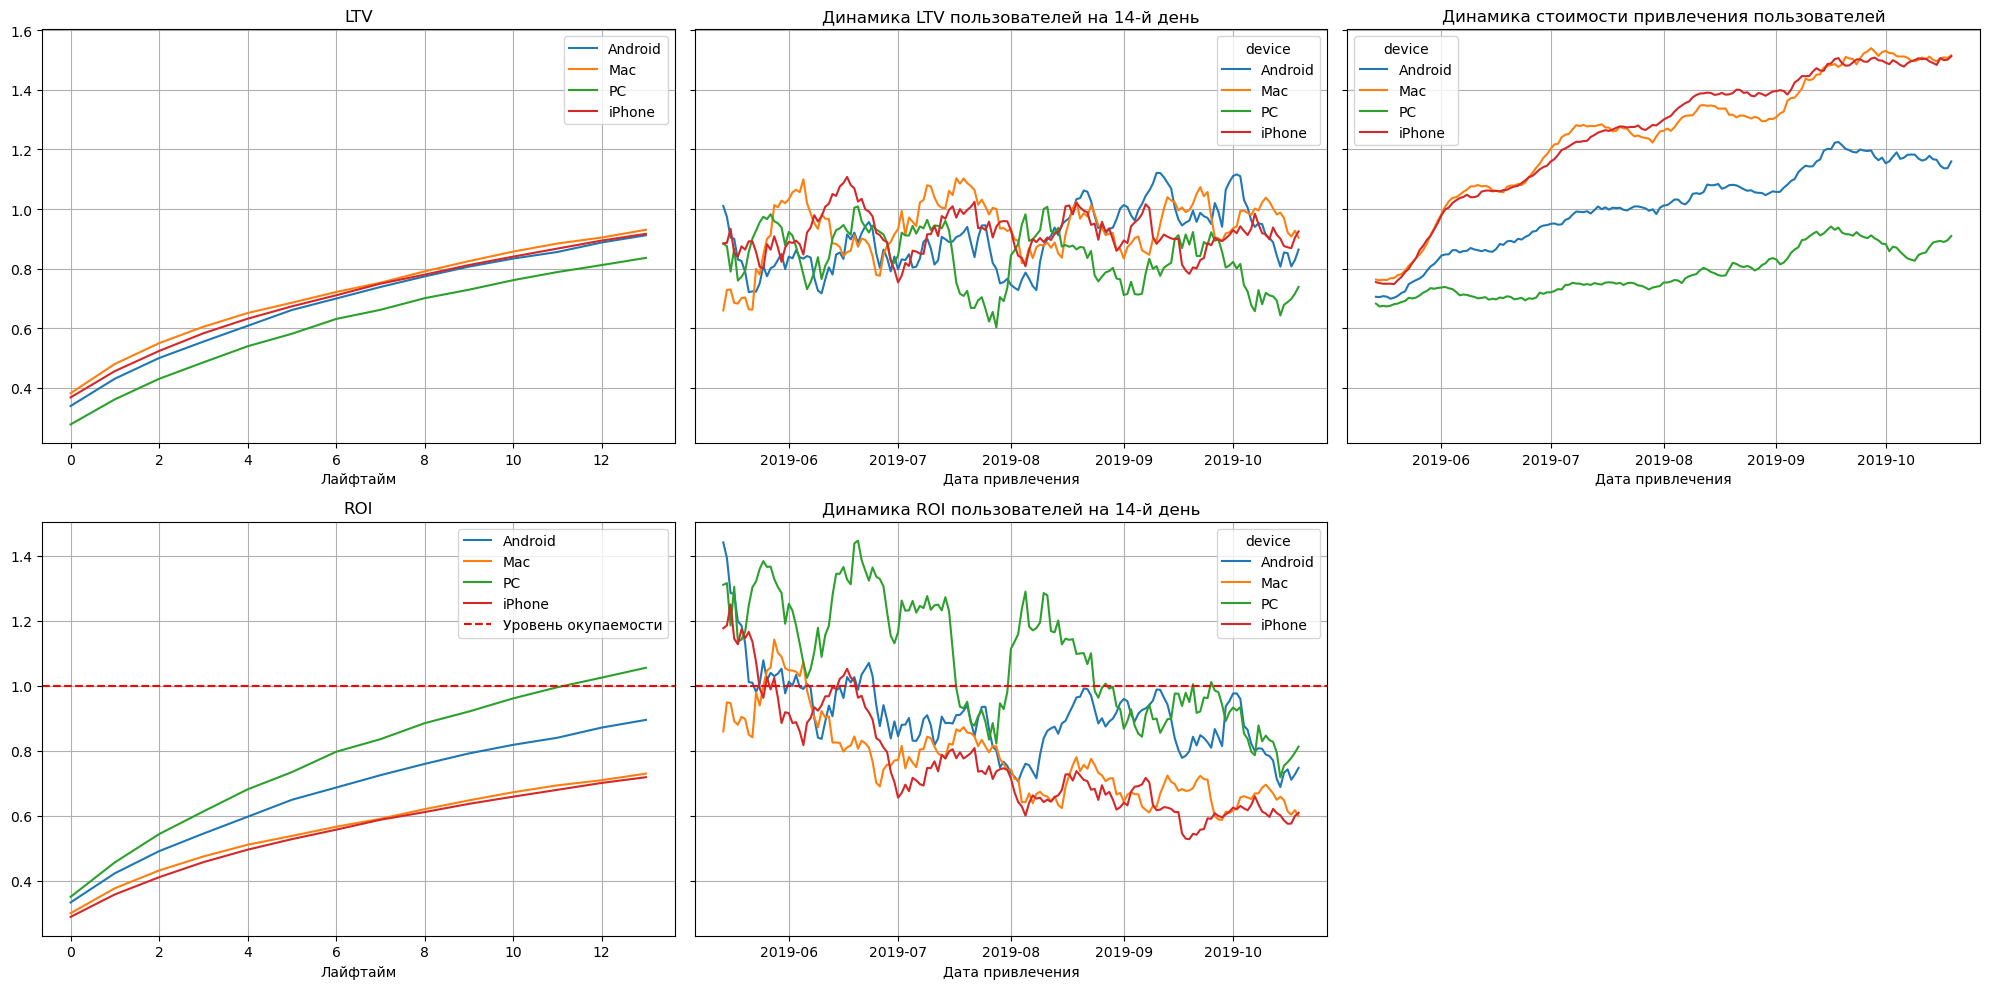

In [42]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Выводы по графикам:

- Динамика показателей окупаемости для всех устройств имеет одинаковую нисходящую тенденцию. Видно, что наибольшее падение ROI и наибольшее увеличение CAC приходится на июнь.
- LTV подвержен сезонности, о которой говорилось ранее.
- По пользователям, использующим iPhone, MAC и Android реклама не окупается уже с июня. По пользователям, использующим PC - в июле и далее с сентября.

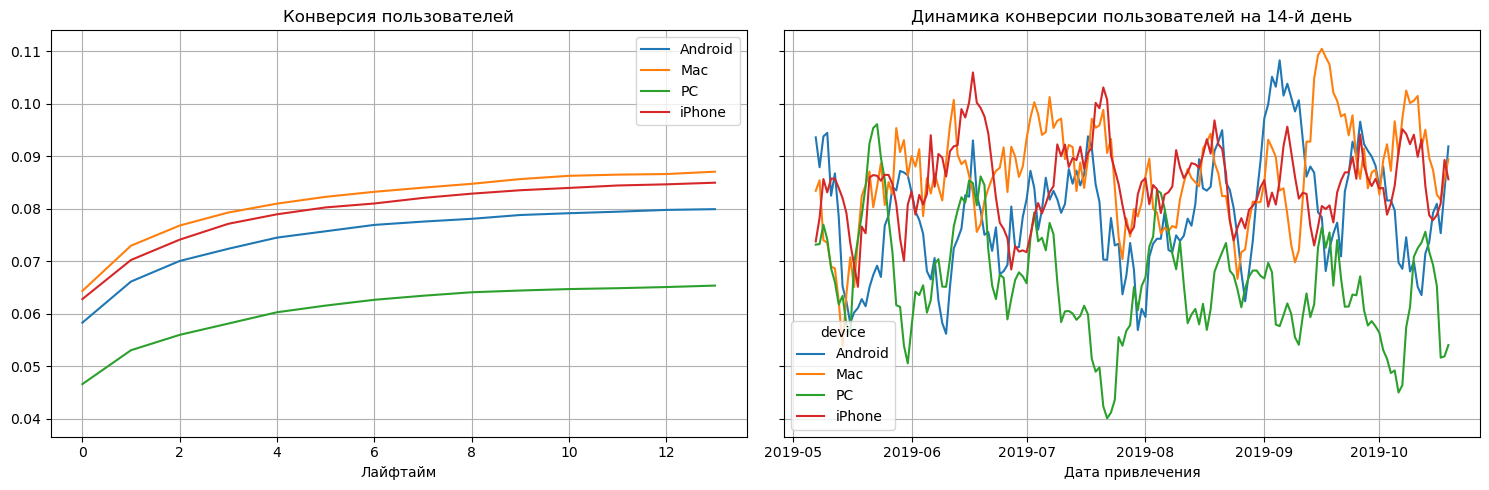

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

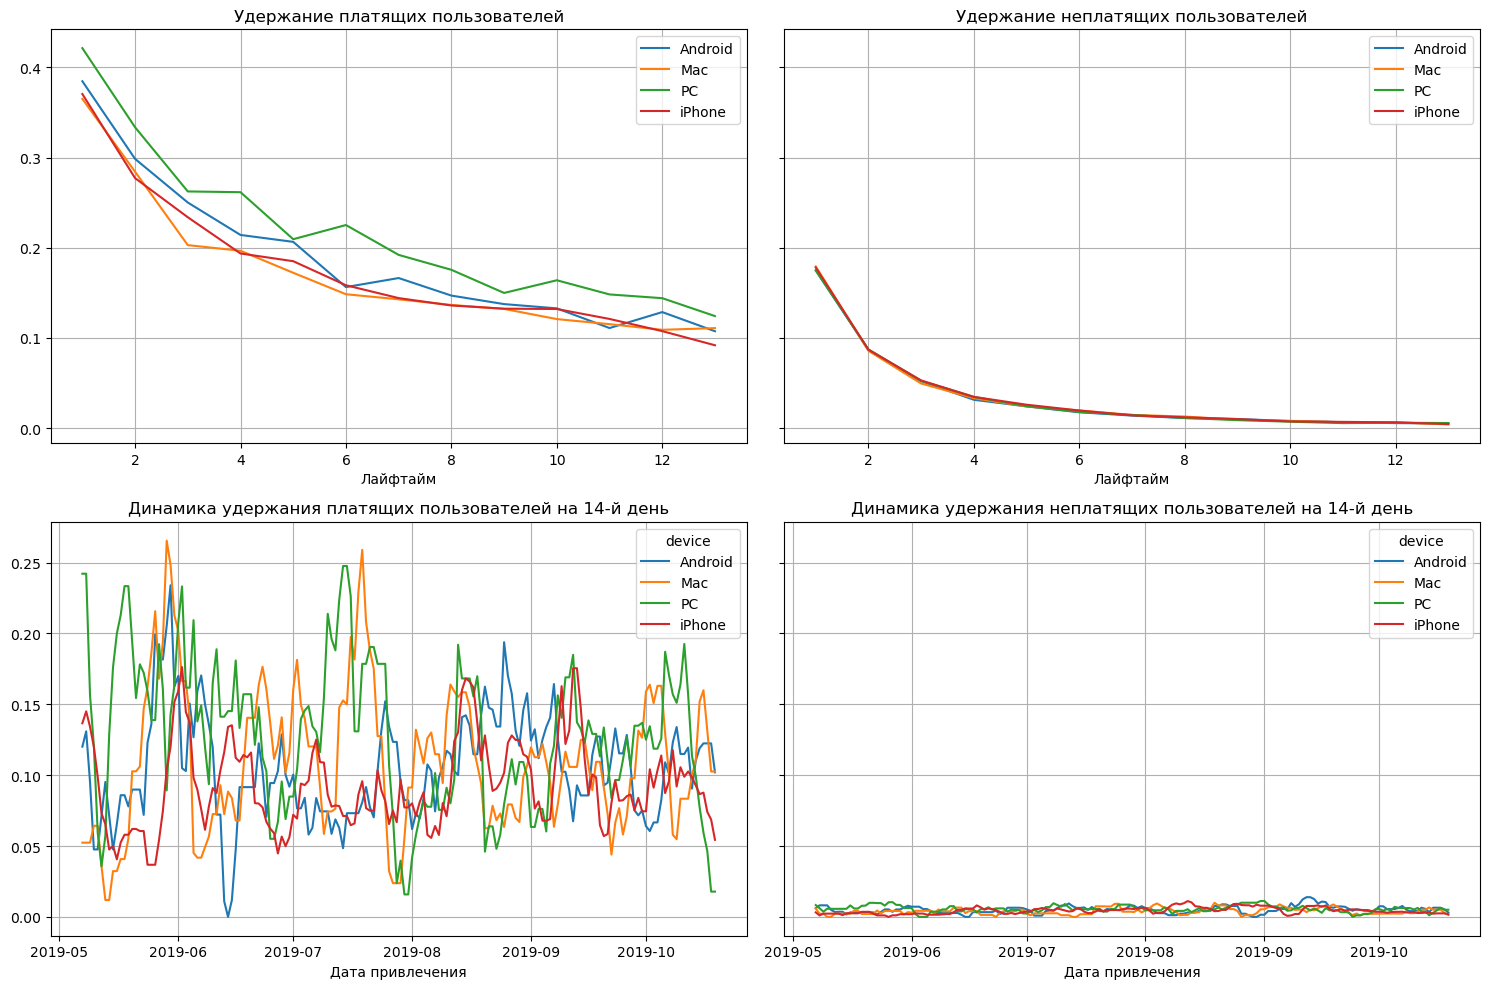

In [44]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По графикам конверсии и удержания видны одинаковые закономерности по устройствам. Единственное, видно, что по пользователям, заходящим с PC при конверсии ниже, чем по другим устройствам, удержание - выше. Однако для выявления причин убытков нам это не поможет.

**Графики LTV, ROI, динамики LTV, CAC и ROI, конверсия и удержание по странам**

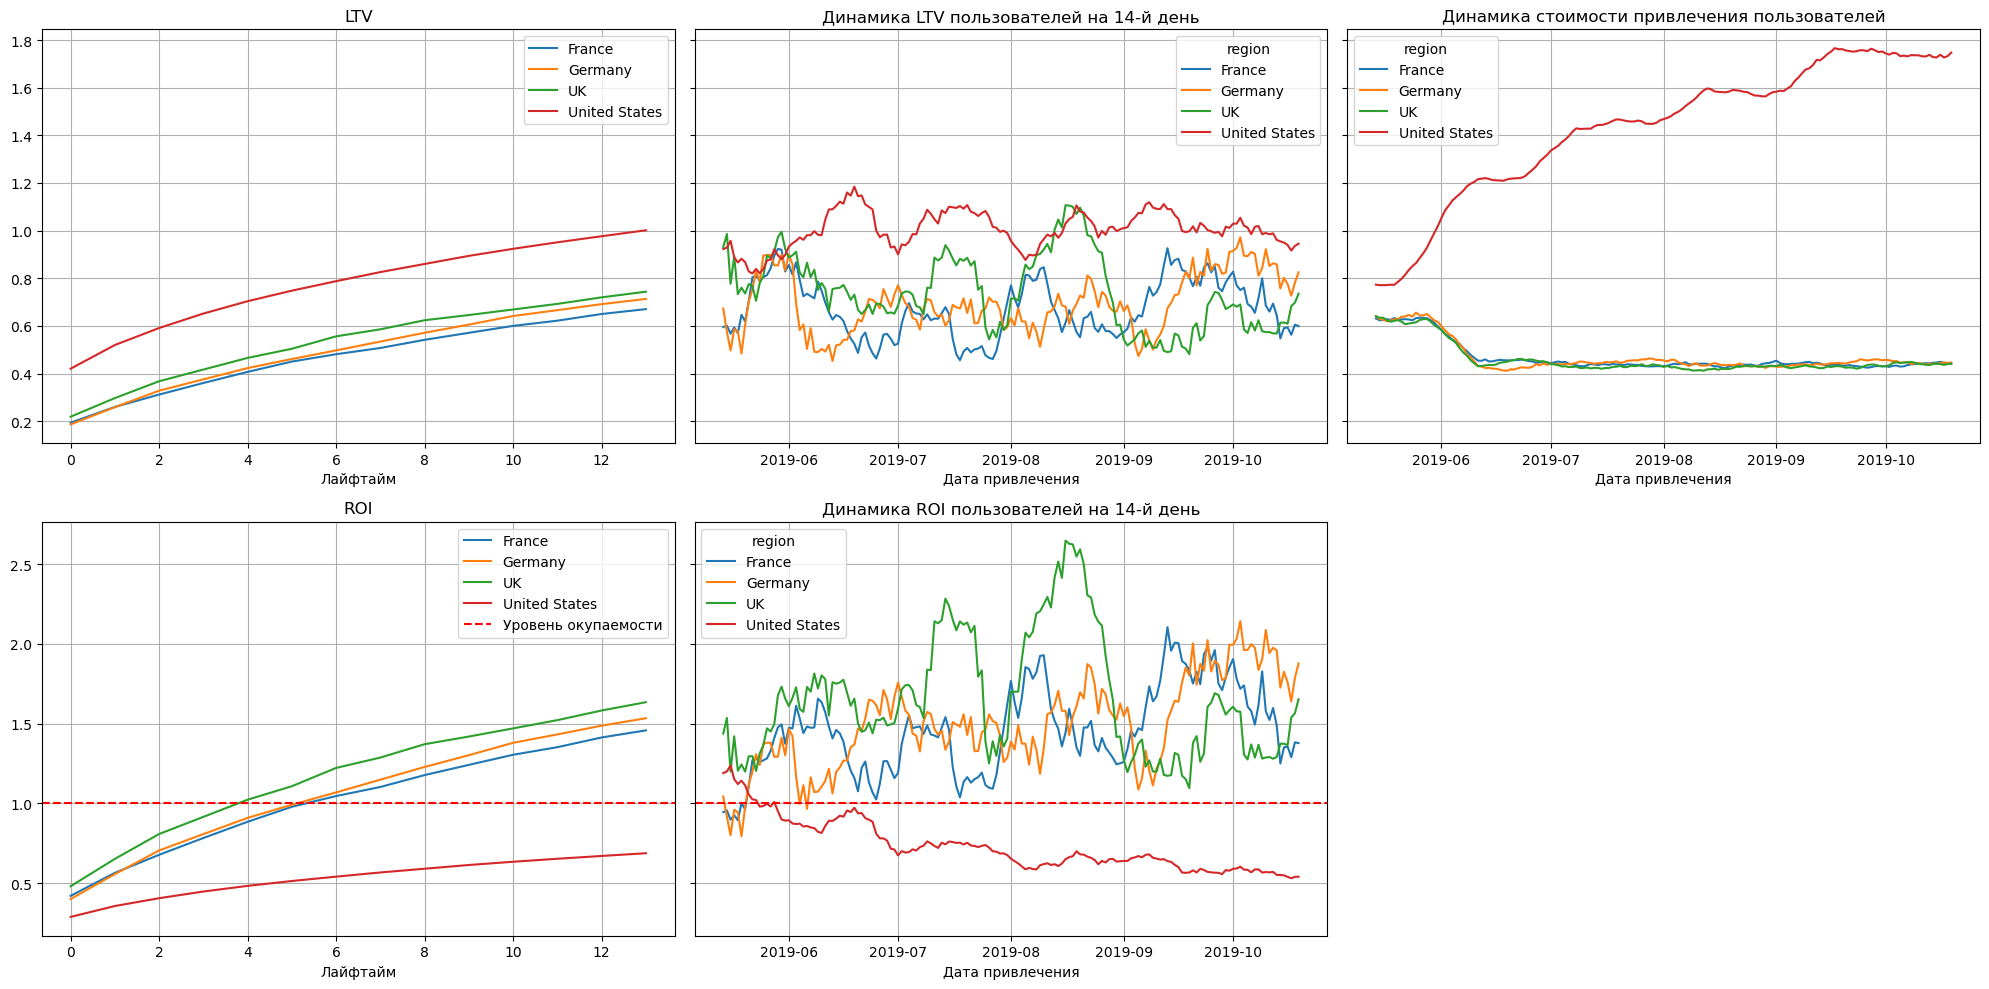

In [45]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

По графикам видно, что в конце мая - начале июня резко возросла стоимость CAC по пользователям из США. При этом только по данной стране маркетинговые инвестиции не окупаются. По остальным странам CAC в конце мая - начале июня, наоборот, сократилась.

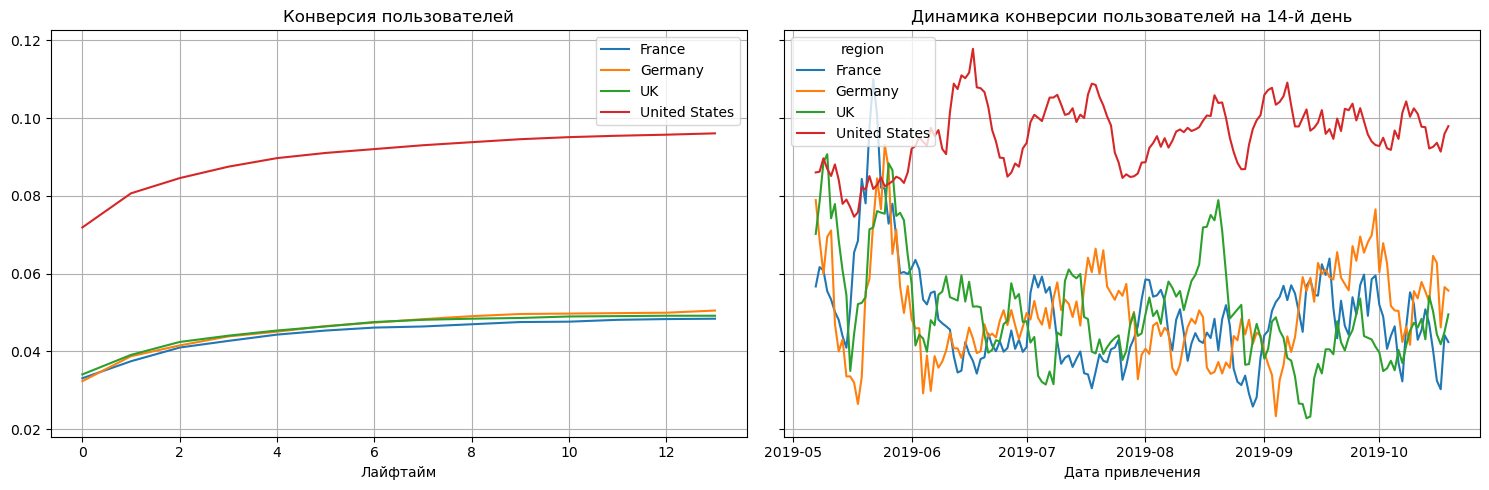

In [46]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

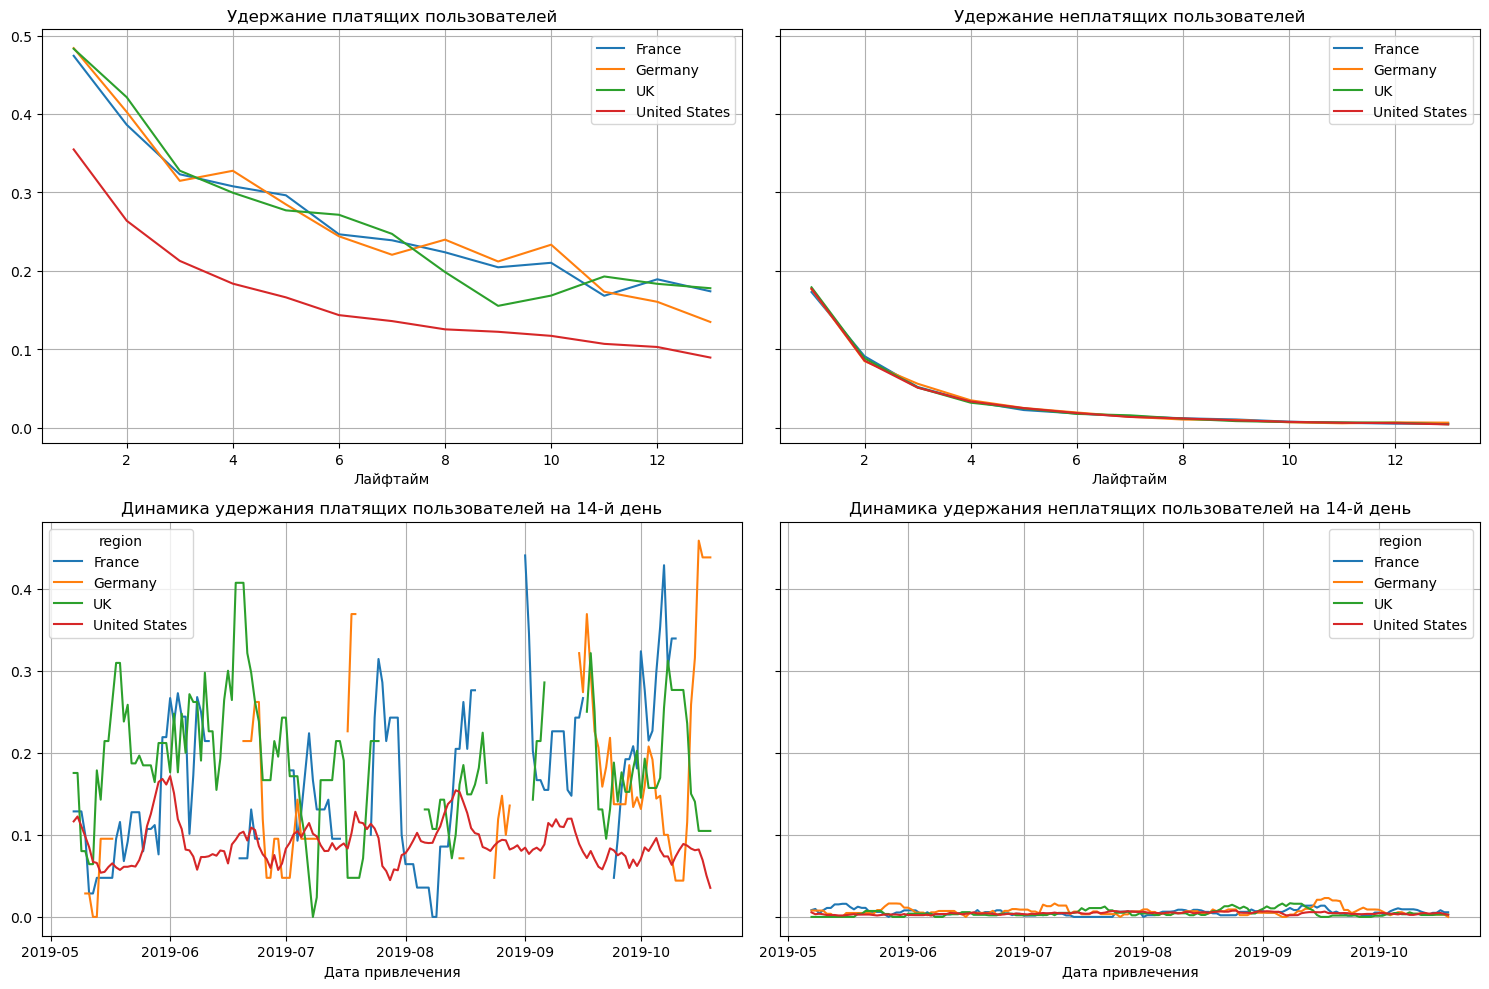

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По этим графикам видно, что конверсия пользователей из США самая высокая, а удержание платящих пользователей самое низкое. Таким образом, именно рекламная компания в США является неуспешной.

**Графики LTV, ROI, динамики LTV, CAC и ROI, конверсия и удержание по каналам**

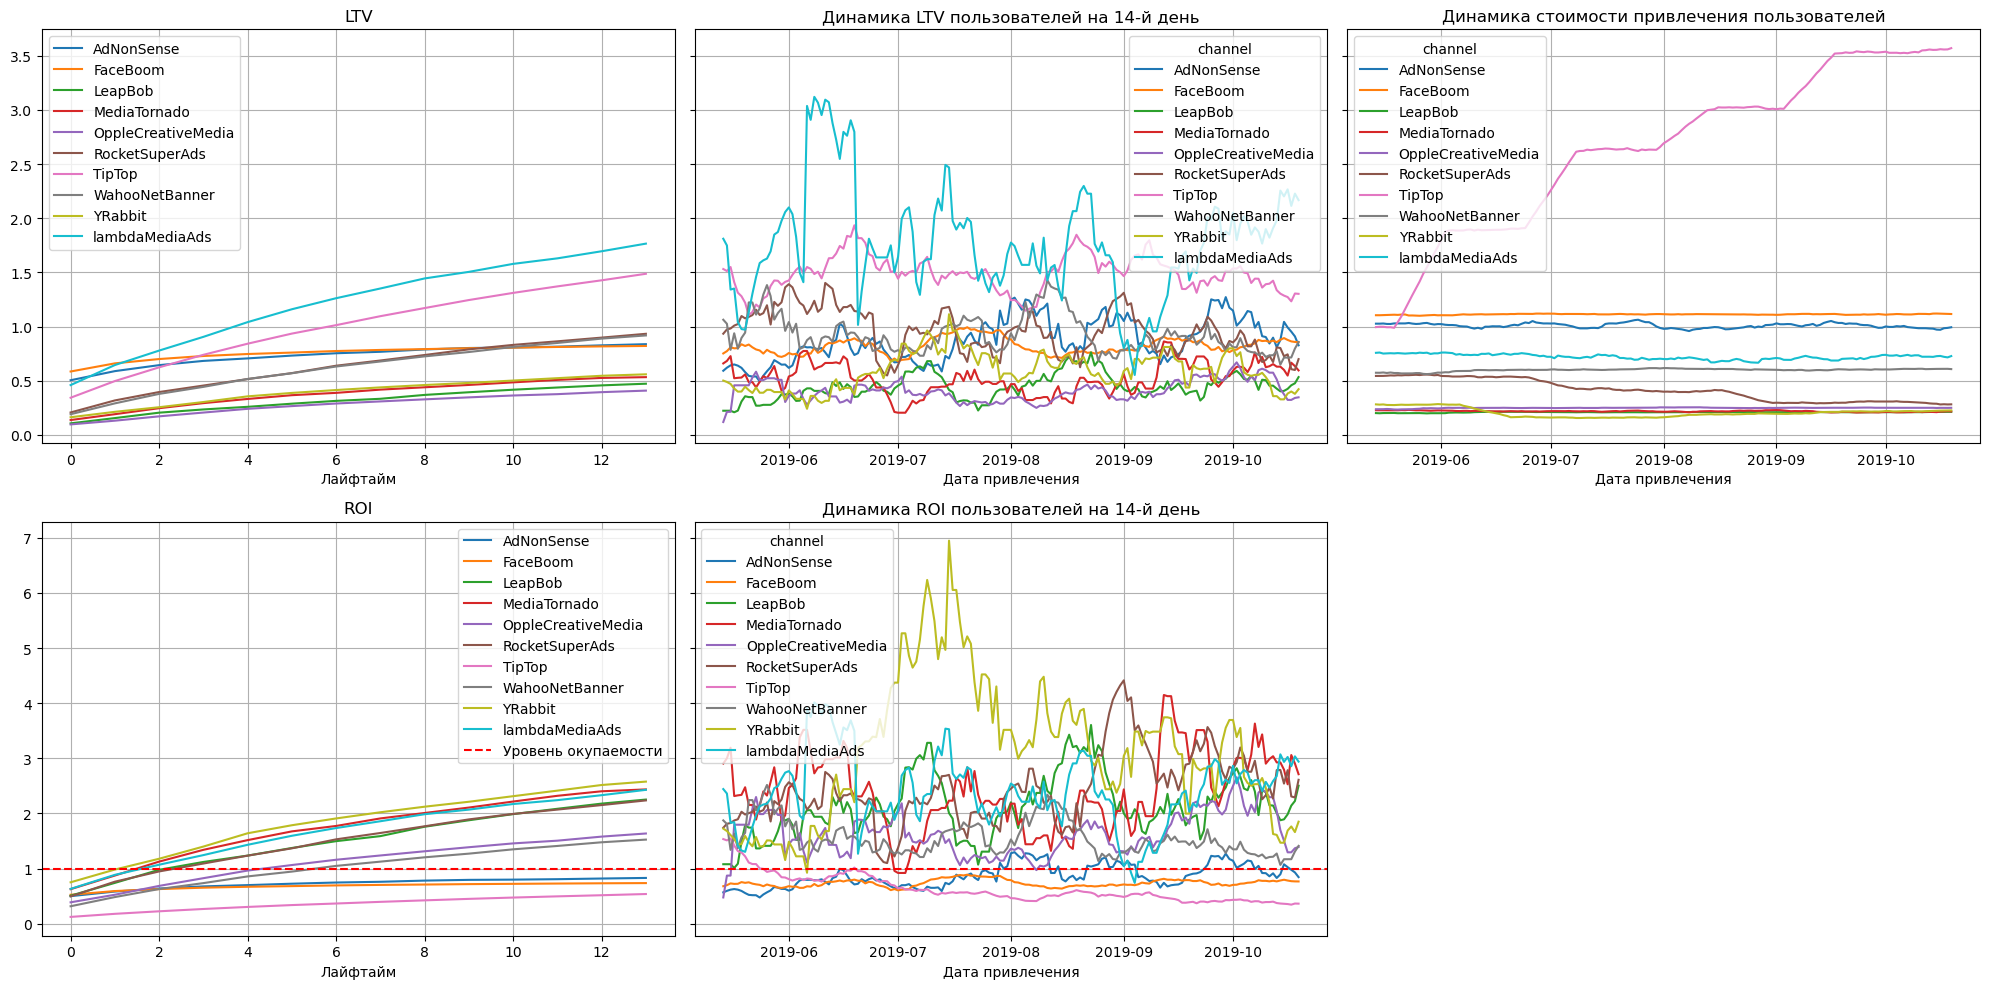

In [48]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

По графикам видно, что стоимость привлечения пользователей сильно растет по каналу TipTop. Также видно, что реклама не окупается по каналам TipTop, AdNonSense и FaceBoom.

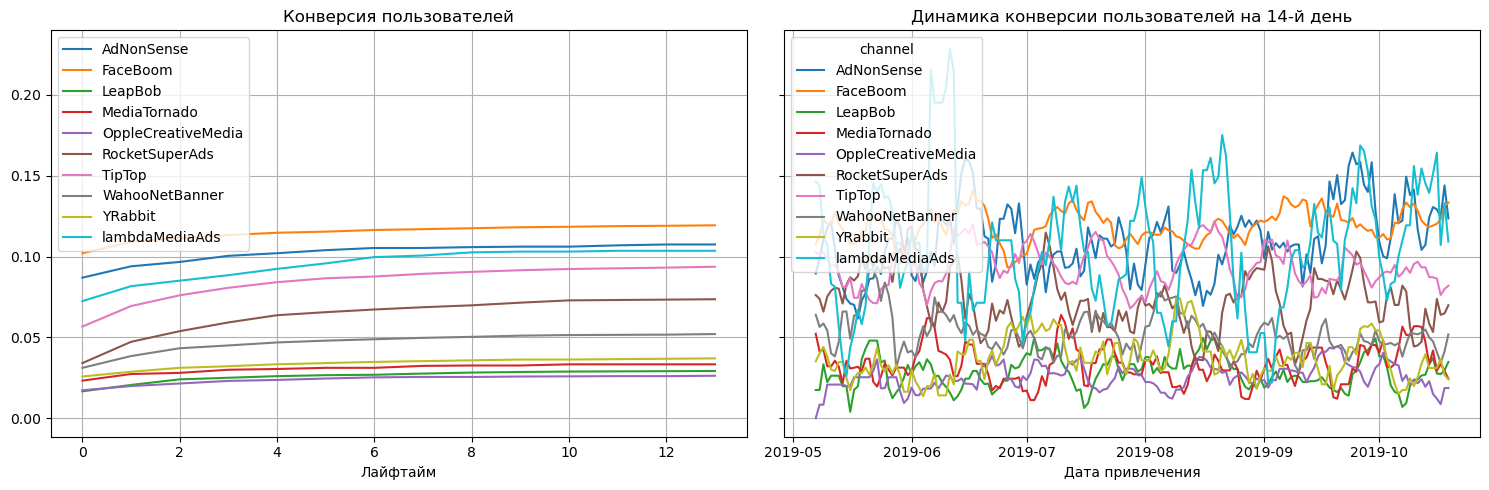

In [49]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

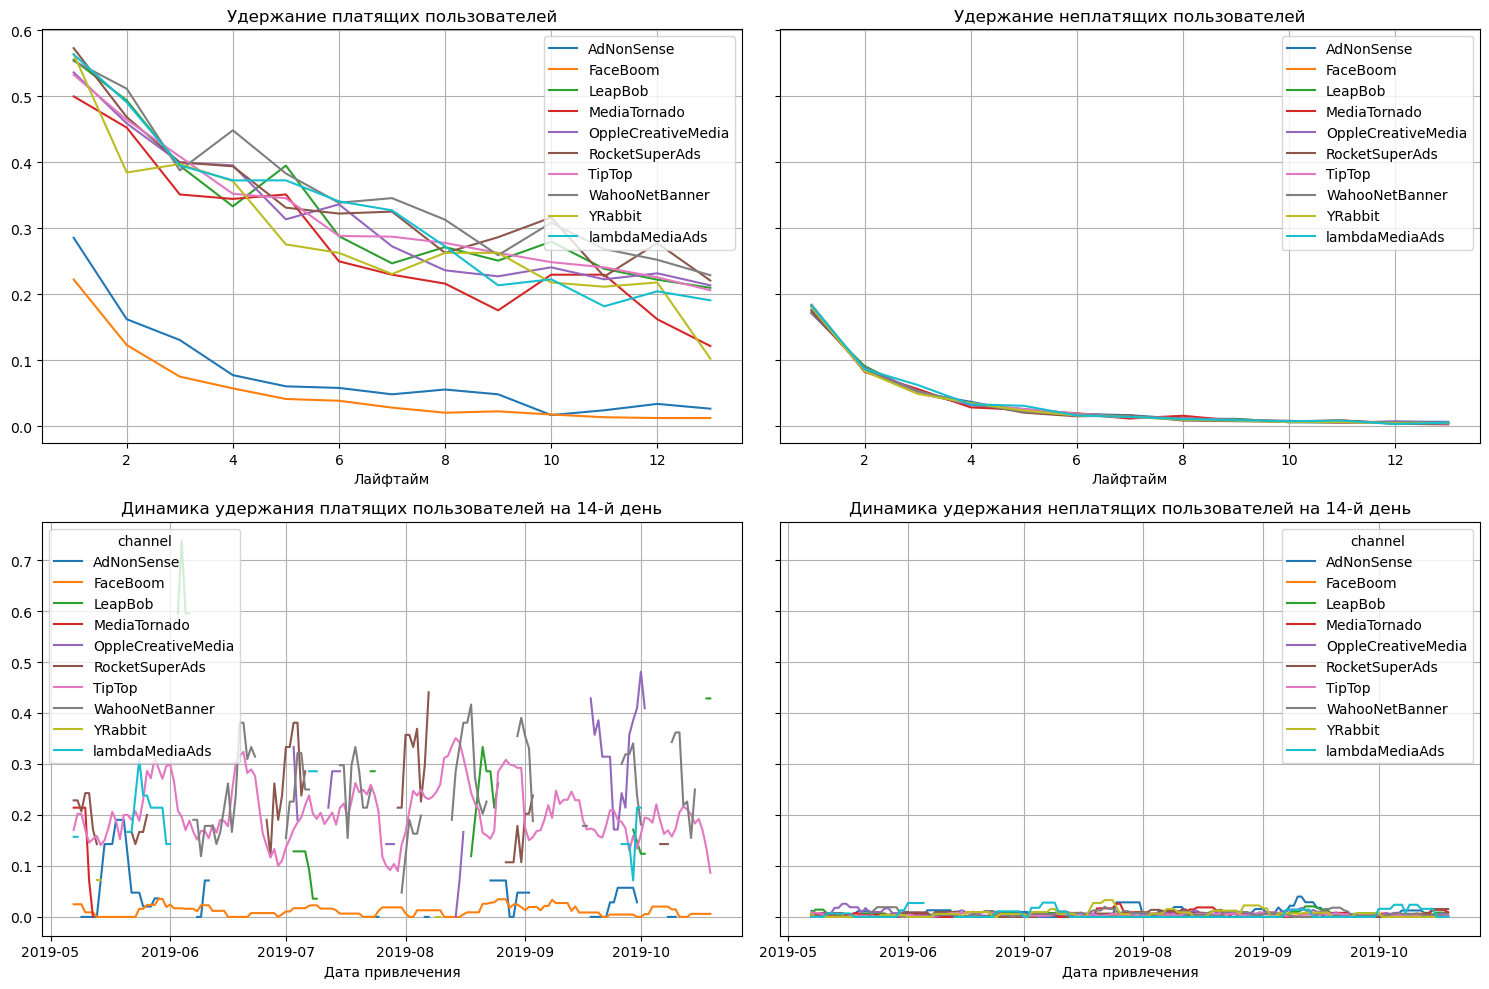

In [50]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По этом графикам видно, что самое низкое удержание платящих пользователей приходится на каналы: AdNonSense и FaceBoom.

**Конверсия и удержание пользователей из США в разбивке по каналам**

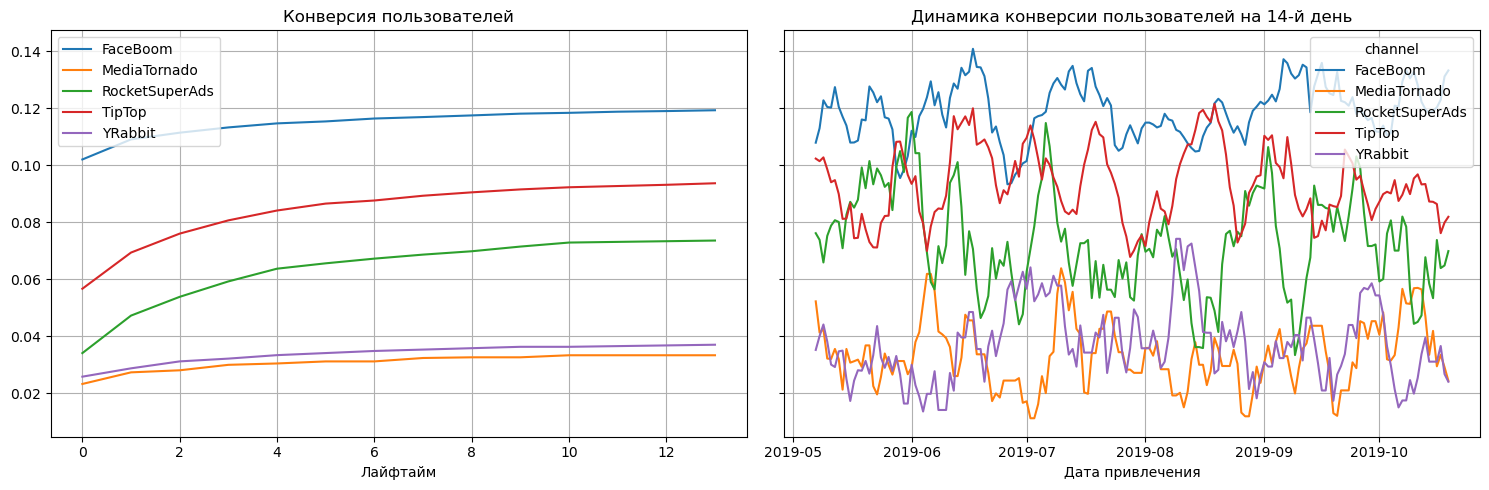

In [51]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

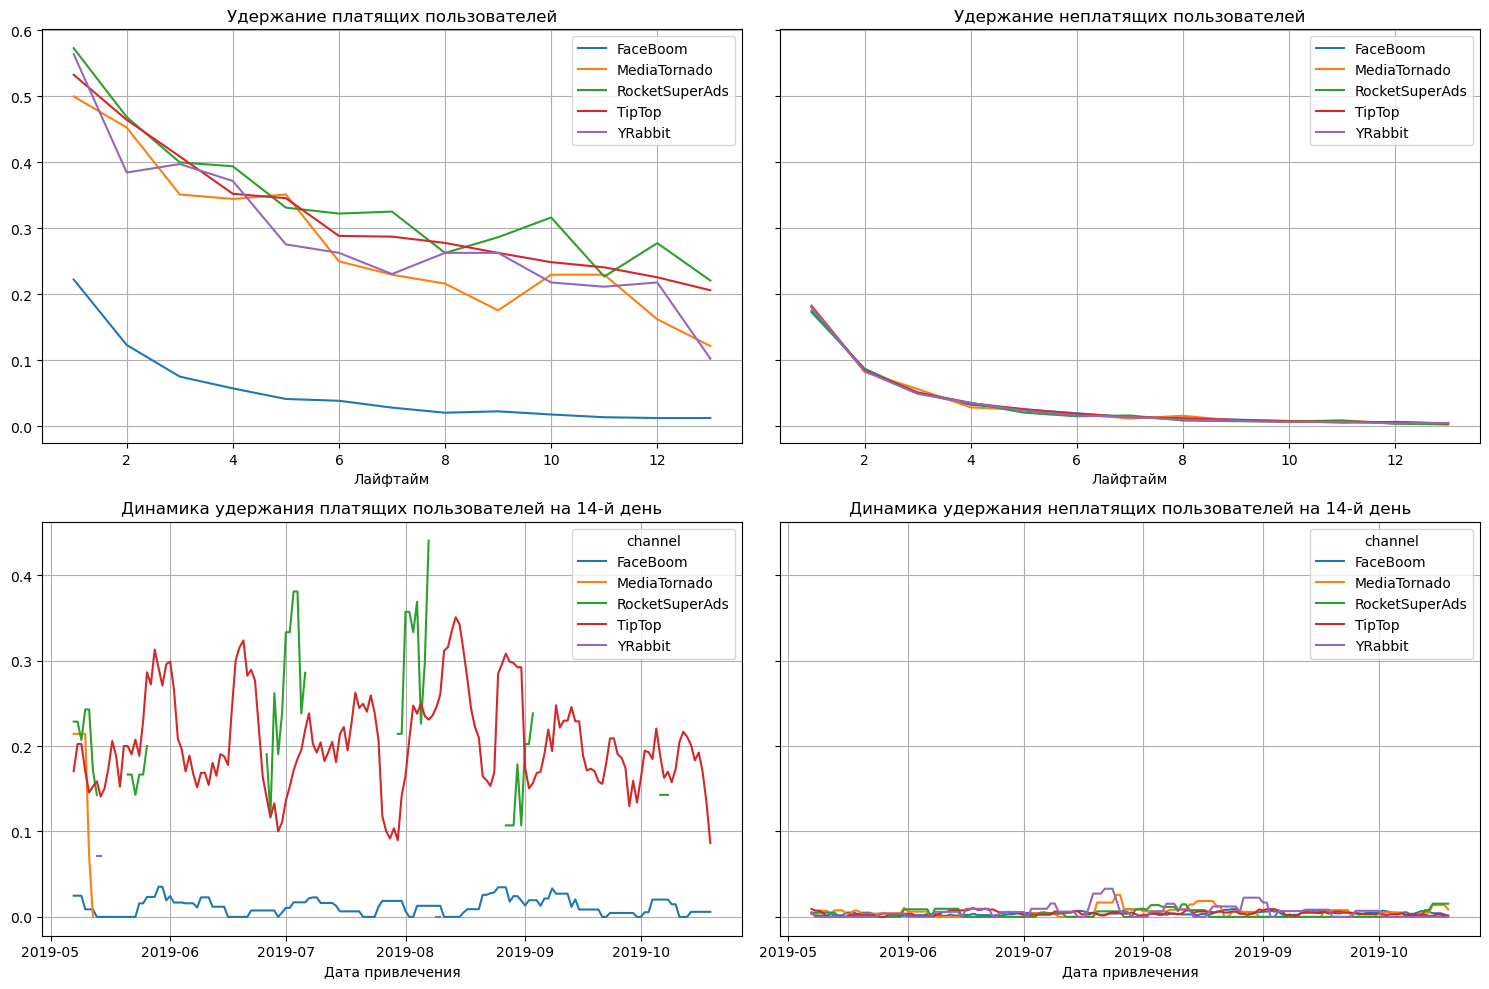

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На этих графиках выделяется канал FaceBoom: при самом высоком уровке конверсии, удержание платящих пользователей к концу второй недели стремится к нулю.
Также видно, что при высокой стоимости рекламной компании в TipTop, удержание платящих пользователей находится на уровне других каналов.

**Конверсия и удержание пользователей из США в разбивке по устройствам**

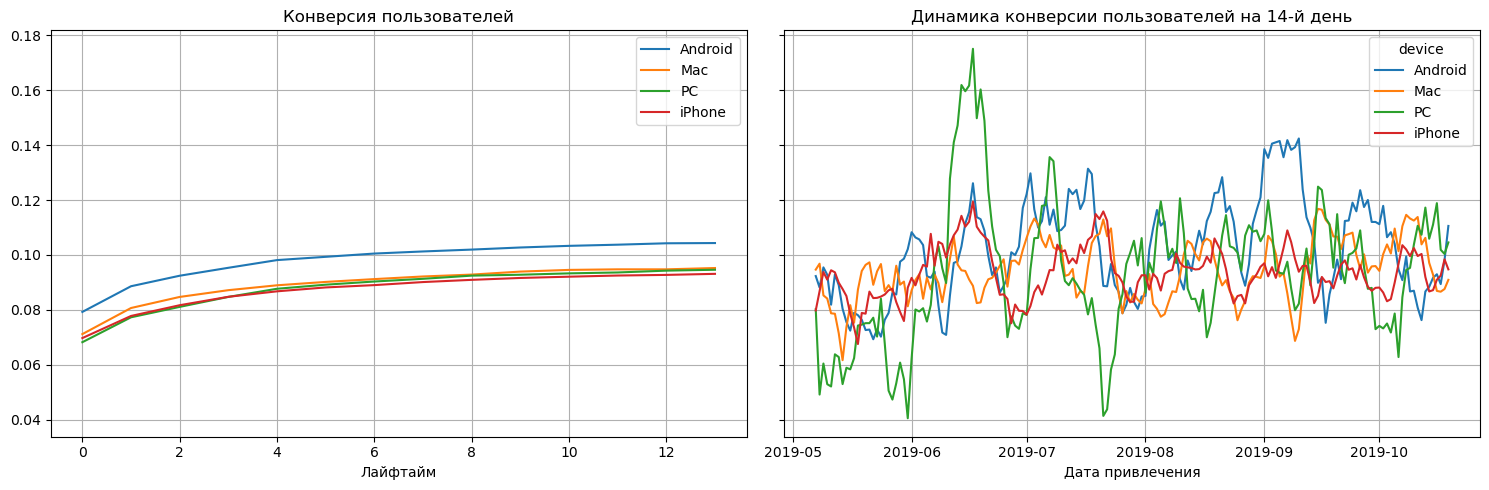

In [53]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles.query('region == "United States"'), orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

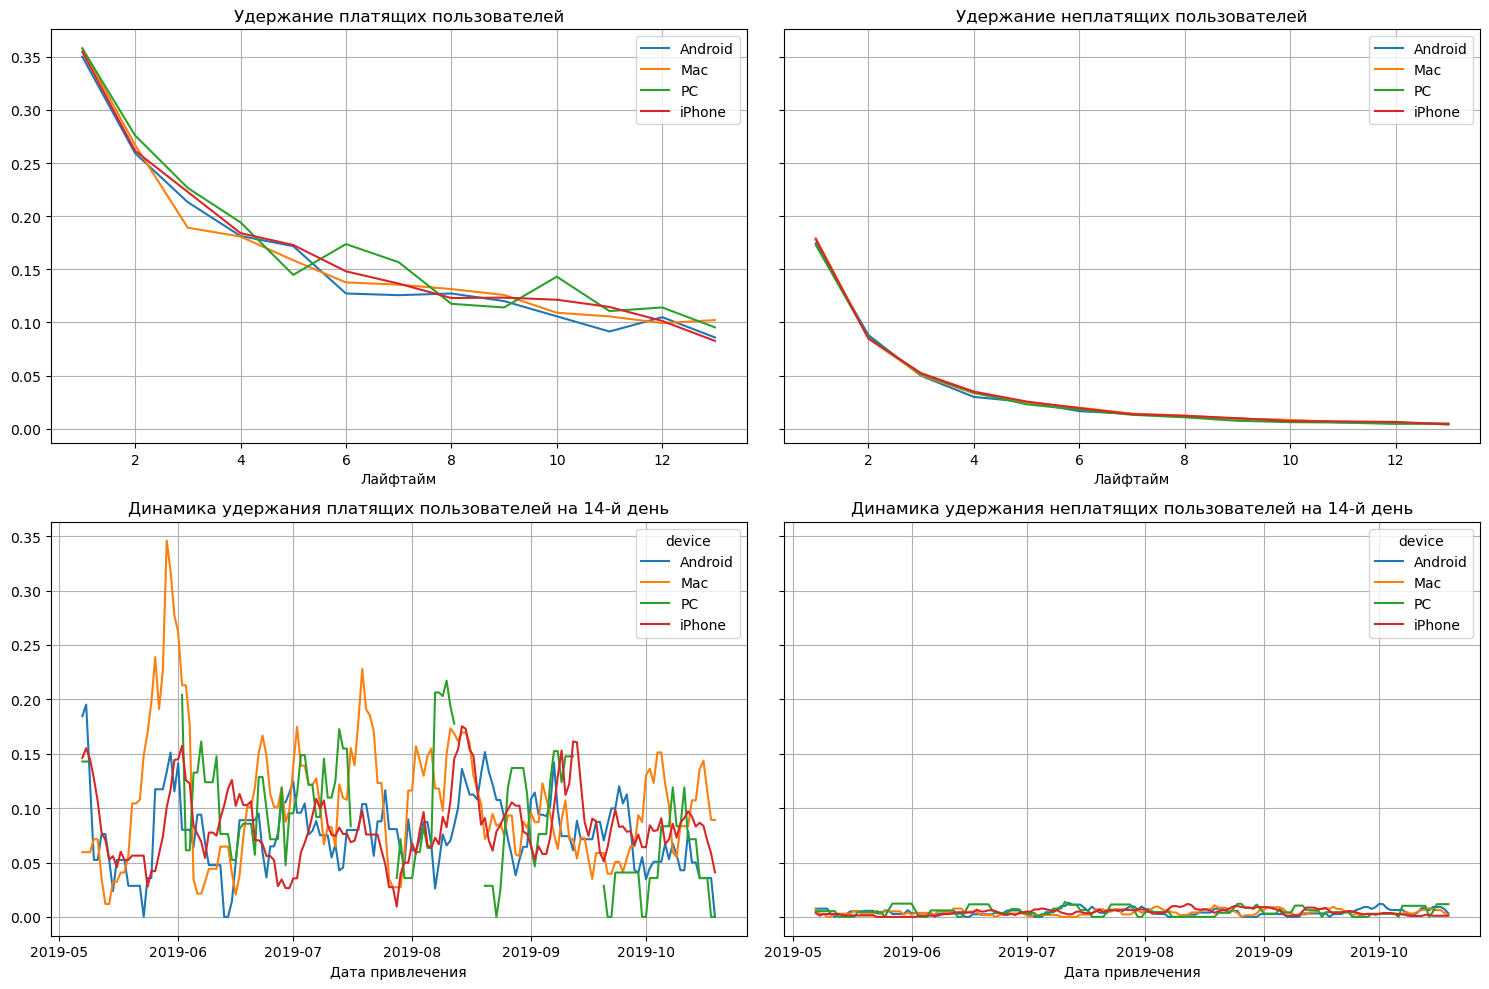

In [54]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('region == "United States"'), visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

По устройствам нет особенной закономерности, позволившей бы нам улучшить маркетинг приложения.

**Выводы по разделу:**

В ходе оценки окупаемости рекламы были сделаны следующие выводы:

1. В целом по всем странам, каналам и устройствам рекламная компания за изучаемый период не окупается. ROI в конце второй недели немного не дотягивает до 100%.


2. CAC резко вырос в конце мая - начале июня и продолжил расти до октября за счет высокой стоимости рекламы в TipTop. На этот канал привлечения приходится более половины всех трат на рекламу.


3. Среди каналов реклама не окупается в TipTop, AdNonSense и FaceBoom. Самое низкое удержание платящих пользователей приходится на каналы AdNonSense и FaceBoom.


4. Динамика показателей окупаемости для всех устройств имеет одинаковую нисходящую тенденцию:
- по пользователям, использующим iPhone, MAC и Android реклама не окупается уже с июня,
- по пользователям, использующим PC - реклама не окупалась в июле и далее с сентября.


5. Маркетинговые инвестиции в разбивке по странам не окупаются только в США. По этой стране в конце мая - начале июня резко возросла стоимость CAC. Конверсия пользователей из США самая высокая, а удержание платящих пользователей самое низкое. Хуже всего здесь дает результаты рекламная кампания в FaceBoom: при самом высоком уровне конверсии, удержание платящих пользователей к концу второй недели стремится к нулю. Кроме того, при высокой стоимости рекламной кампании в TipTop, удержание платящих пользователей находится на уровне других каналов, что подвергает сомнению ее целесообразность.


6. На LTV влияет сезонный фактор, который мы отмечали при исследовательском анализе.

### Общие выводы

- Выделим причины неэффективности привлечения пользователей.
- Сформулируем рекомендации для отдела маркетинга.

**В результаты проведенного анализа были выявлены следующие причины неэффективности привлечения пользователей:**

1. Неокупаемость маркетинговых инвестиции в США. При высокой конверсии удержание платящих пользователей является очень низким. Хуже всего здесь дает результаты рекламная кампания в FaceBoom и TipTop:
- удержание платящих пользователей, привлеченных через FaceBoom к концу второй недели стремится к нулю;
- стоимость стоимости рекламной кампании в TipTop слишком завышена (при одинаковом уровне удержания платящих пользователей стоимость привлечения по TipTop превосходит другие каналы в несколько раз).


2. CAC резко выросла в конце мая - начале июня и продолжила расти до октября за счет высокой стоимости рекламы в TipTop. На этот канал привлечения приходится более половины всех трат на рекламу.


3. Среди каналов реклама не окупается в TipTop, AdNonSense и FaceBoom. Самое низкое удержание платящих пользователей приходится на каналы AdNonSense и FaceBoom.


**На основе этих выводов можно сформировать следующие рекомендации для отдела маркетинга:**

1. Рассмотреть причины завышения цены рекламы в TipTop и найти пути снижения стоимости рекламной кампании в TipTop.


2. Рассмотреть причины низкого удержания платящих пользователей из США, особенно привлеченных из FaceBoom. Найти способы повышения удержания.


3. Рассмотреть причины низкого удержания платящих пользователей, привлеченных через AdNonSense. Найти способы повышения удержания и рассмотреть целесообразность проведения рекламной кампании через AdNonSense.


4. Сконцентрировать маркетинговые мероприятия на каналах, с высоким уровнем удержания платящих пользователей и ROI:
- lambdaMediaAds,
- WahooNetBanner,
- RocketSuperAds.